# Homework I - Programming

## Exercise 1

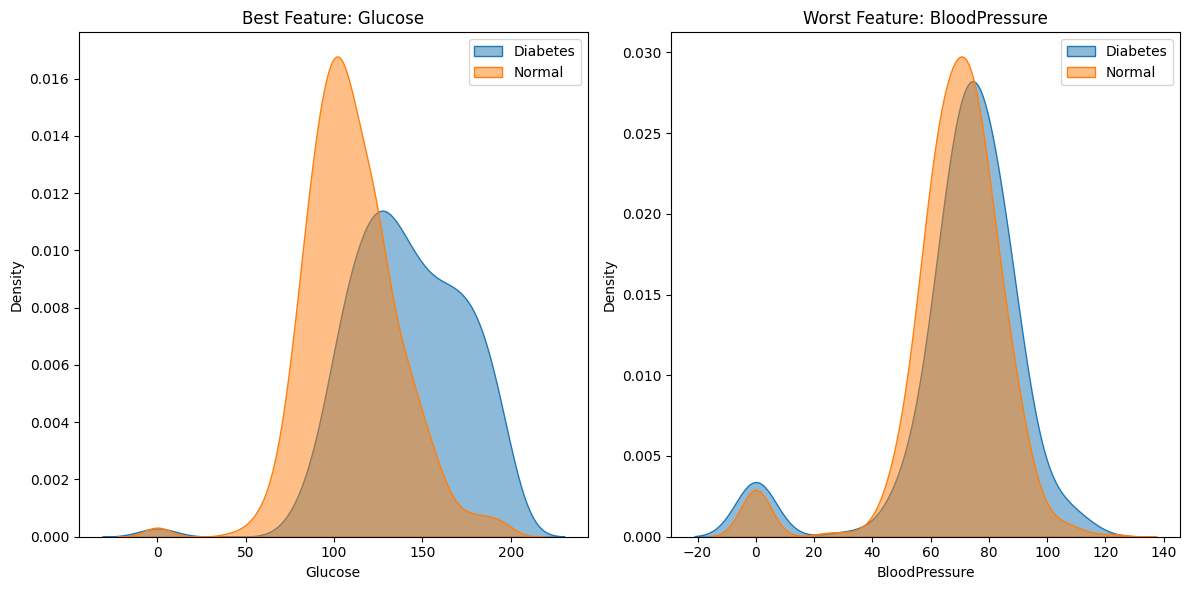

In [15]:
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reading the ARFF file
df = pd.DataFrame(loadarff('diabetes.arff')[0])
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Find input variables discriminative power
disc_power = f_classif(df.drop('Outcome', axis = 1), df['Outcome'])[0]
min, max = disc_power[0], disc_power[0]
minIdx, maxIdx = 0, 0

# Identify the input variables with the worst and best dicriminative power
for e in enumerate(disc_power):
    if min > e[1]:
        min = e[1]
        minIdx = e[0]
    if max < e[1]:
        max = e[1]
        maxIdx = e[0]

df['Outcome'] = df['Outcome'].replace({'1': 'Diabetes', '0': 'Normal'})
best_feature = df.columns[maxIdx]
worst_feature = df.columns[minIdx]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['Outcome'] == 'Diabetes'][best_feature], \
           label= 'Diabetes', fill= True, alpha = 0.5 )
sns.kdeplot(data=df[df['Outcome'] == 'Normal'][best_feature], \
           label= 'Normal', fill= True, alpha = 0.5)
plt.title(f'Best Feature: {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Outcome'] == 'Diabetes'][worst_feature], \
           label= 'Diabetes', fill= True, alpha = 0.5 )
sns.kdeplot(data=df[df['Outcome'] == 'Normal'][worst_feature], \
           label= 'Normal', fill= True, alpha = 0.5 )
plt.title(f'Worst Feature: {worst_feature}')
plt.xlabel(worst_feature)
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

## Exercise 2

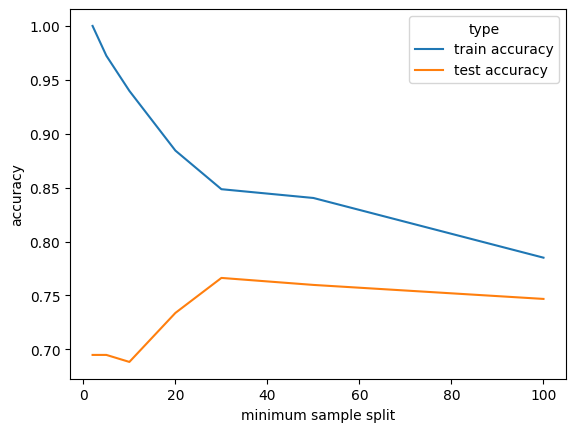

In [8]:
from scipy.io.arff import loadarff
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reading the ARFF file
df = pd.DataFrame(loadarff('diabetes.arff')[0])
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Partition data
x_train, x_test, z_train, z_test = train_test_split(
    df.drop('Outcome', axis=1),
    df['Outcome'],
    train_size=0.8,
    random_state=1,
    stratify=df['Outcome']
)

runs_per_split = 10
min_splits = (2, 5, 10, 20, 30, 50, 100)
train_accuracies = []
test_accuracies = []

for min_split in min_splits:
    train_acc = 0
    test_acc = 0

    for i in range(runs_per_split):
        # learn classifier and calculate accuracies
        classif = tree.DecisionTreeClassifier(min_samples_split=min_split, random_state=1)
        classif.fit(x_train, z_train)
        train_acc += metrics.accuracy_score(z_train, classif.predict(x_train))
        test_acc += metrics.accuracy_score(z_test, classif.predict(x_test))
    
    train_accuracies.append(train_acc / runs_per_split)
    test_accuracies.append(test_acc / runs_per_split)

# Plot data
accdf = pd.DataFrame({
    'minimum sample split': min_splits,
    'train accuracy': train_accuracies,
    'test accuracy': test_accuracies
})

accdf = pd.melt(
    accdf,
    id_vars='minimum sample split',
    value_vars=['train accuracy', 'test accuracy'],
    var_name='type',
    value_name='accuracy'
)

sns.lineplot(x='minimum sample split', y='accuracy', data=accdf, hue='type')
plt.show()

## Exercise 4

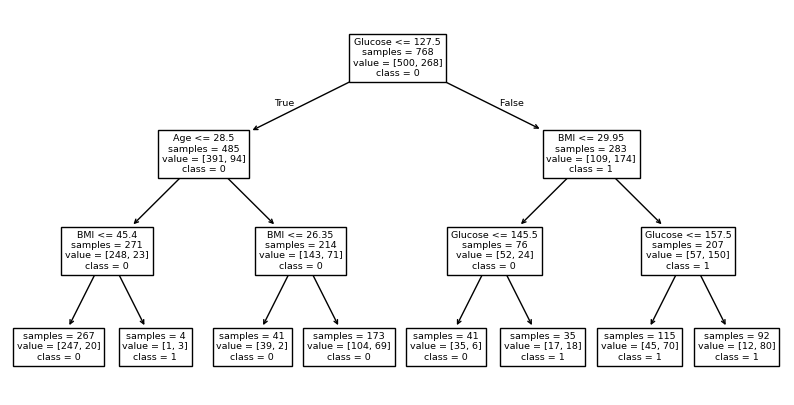

In [13]:
from scipy.io.arff import loadarff
from sklearn import tree
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd

# Reading the ARFF file
df = pd.DataFrame(loadarff('diabetes.arff')[0])
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

x = df.drop('Outcome', axis=1)
z = df['Outcome']

# learn and plot classifier
classif = tree.DecisionTreeClassifier(max_depth=3, random_state=1)
classif.fit(x, z)
plt.figure(figsize=(10, 5))
tree.plot_tree(classif, feature_names=x.columns, class_names=classif.classes_, impurity=False)
plt.show()